In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# Читаем файлы с датасетами

full_df = pd.read_csv('test_data_ECG.csv')

full_df

,subject_id,Count_subj,study_id,cart_id,Healthy_Status,eeg_time,eeg_date,report_0,report_1,report_2,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
0,19557662,27,40000017,6848296,0,8:44 AM,27.06.2015,Sinus rhythm,Possible right atrial abnormality,NaN,...,60 Hz notch Baseline filter,659,40,128,170,258,518,81,77,79
1,18477137,93,40000029,6848296,0,9:54 AM,27.06.2015,Sinus rhythm,Possible right atrial abnormality,NaN,...,60 Hz notch Baseline filter,722,40,124,162,246,504,77,75,70
2,16598616,3,40000035,6376932,1,9:07 AM,28.06.2015,Sinus tachycardia,NaN,Normal ECG except for rate,...,60 Hz notch Baseline filter,600,40,130,162,244,474,79,72,77
3,16368287,7,40000079,6214760,1,5:14 PM,15.07.2015,Sinus rhythm,NaN,Normal ECG,...,60 Hz notch Baseline filter,659,40,146,180,254,538,79,66,69
4,18370366,2,40000084,6632385,0,1:52 PM,27.09.2015,Sinus rhythm,NaN,NaN,...,<not specified>,659,368,29999,504,590,868,84,80,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19612562,29,40125255,6752764,1,11:26 AM,12.04.2016,Sinus rhythm,NaN,Normal ECG,...,60 Hz notch Baseline filter,606,40,162,204,298,526,64,68,66
9996,14816795,1,40125256,6555070,1,6:01 PM,12.04.2016,Sinus rhythm,NaN,Normal ECG,...,60 Hz notch Baseline filter,606,40,160,202,294,534,70,73,66
9997,11919067,4,40125266,6632385,0,9:58 AM,23.02.2014,Sinus rhythm,NaN,NaN,...,<not specified>,870,348,29999,506,586,882,49,64,49
9998,13871862,2,40125273,6848296,1,5:38 PM,03.01.2011,Sinus rhythm,NaN,Normal ECG,...,60 Hz notch Baseline filter,789,40,158,192,288,592,43,14,15


In [3]:
# Группировка

full_df = full_df.sort_values(by='subject_id', ascending=True)

full_df

,subject_id,Count_subj,study_id,cart_id,Healthy_Status,eeg_time,eeg_date,report_0,report_1,report_2,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
5326,10000635,6,40067704,6505568,0,8:24 AM,02.01.2013,Regular atrial pacing,NaN,Abnormal ECG,...,60 Hz notch Baseline filter,845,29999,29999,200,300,604,29999,51,84
4448,10001877,4,40056908,6919786,0,10:32 AM,27.06.2014,Possible ectopic atrial bradycardia,Inferior/lateral ST-T changes are nonspecific,NaN,...,60 Hz notch Baseline filter,1034,40,120,152,248,568,-45,28,-18
8586,10002155,13,40107403,6578848,0,10:15 AM,29.09.2010,Sinus rhythm,*** report made without knowing patient's sex ***,Lateral ST elevation - repeat if myocardial in...,...,60 Hz notch Baseline filter,983,40,148,212,306,622,14,19,5
1917,10002221,13,40024801,6903271,0,4:14 AM,12.04.2015,Sinus rhythm with 1st degree A-V block,Possible anteroseptal infarct - age undetermined,Lateral T wave changes may be due to myocardia...,...,Baseline filter,769,40,134,268,350,704,39,-3,78
5058,10003019,23,40064176,6632385,0,3:13 PM,20.05.2012,Sinus rhythm,Atrial premature complex,Nonspecific IVCD with LAD,...,<not specified>,1000,297,29999,502,622,930,62,-57,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,19997367,36,40065685,6752764,0,10:57 PM,19.11.2010,Sinus tachycardia with sinus arrhythmia with f...,Left ventricular hypertrophy,Inferior/lateral ST-T changes may be due to hy...,...,60 Hz notch Baseline filter,495,40,134,154,248,472,63,37,-158
2458,19997367,36,40031683,6919786,0,9:40 AM,04.11.2011,Sinus bradycardia,Leftward axis,ST junctional depression is nonspecific,...,60 Hz notch Baseline filter,1071,40,128,234,338,704,20,-25,17
1155,19998330,10,40014941,6752764,0,2:17 PM,19.12.2013,Atrial fibrillation,Poor R wave progression - probable normal variant,NaN,...,60 Hz notch Baseline filter,740,29999,29999,200,284,554,29999,18,12
1485,19998350,14,40019224,6632385,0,11:46 PM,07.05.2016,Sinus tachycardia,NaN,NaN,...,<not specified>,541,375,29999,505,574,807,44,42,9


In [4]:
# Предобрабатываем данные

# Убираем выбросы
columns_to_filter = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']
full_df_filtered = full_df[(full_df[columns_to_filter] < 2000).all(axis=1)]
full_df_filtered = full_df_filtered[(full_df_filtered['p_onset'] < full_df_filtered['p_end']) & (full_df_filtered['qrs_onset'] < full_df_filtered['qrs_end'])]

# Слепляем все текстовые отчеты в один большой
reports = [f'report_{x}' for x in range(18)]
full_df_filtered['report_0'] = full_df_filtered[reports].astype(str).agg(' '.join, axis=1)
full_df_filtered['report_0'] = full_df_filtered['report_0'].str.replace(r'\bnan\b', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
full_df_filtered.rename(columns={'report_0': 'report'}, inplace=True)
reports_to_drop = [f'report_{x}' for x in range(1, 18)]
full_df_filtered = full_df_filtered.drop(reports_to_drop, axis=1)

# Фиксим имена столбцов
full_df_filtered = full_df_filtered.rename(columns={'eeg_time ': 'eeg_time', 'eeg_date ': 'eeg_date'})

# Делаем колонку с таргетами крайней справа
full_df_filtered = full_df_filtered[[col for col in full_df_filtered.columns if col != 'Healthy_Status'] + ['Healthy_Status']]

# Изменяем формат времени в столбце eeg_time
full_df_filtered['eeg_time'] = pd.to_datetime(full_df_filtered['eeg_time'], format='%I:%M %p').dt.time

# Удаляем эмбеддинг текстового заключения врача, т.к. оно вызыывает переобучение
full_df_filtered.drop("report", axis=1, inplace=True)

full_df_filtered

,subject_id,Count_subj,study_id,cart_id,eeg_time,eeg_date,bandwidth,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis,Healthy_Status
4448,10001877,4,40056908,6919786,10:32:00,27.06.2014,0.005-150 Hz,60 Hz notch Baseline filter,1034,40,120,152,248,568,-45,28,-18,0
8586,10002155,13,40107403,6578848,10:15:00,29.09.2010,0.05-150 Hz,60 Hz notch Baseline filter,983,40,148,212,306,622,14,19,5,0
1917,10002221,13,40024801,6903271,04:14:00,12.04.2015,0.005-150 Hz,Baseline filter,769,40,134,268,350,704,39,-3,78,0
3849,10003757,2,40049308,6672155,19:02:00,22.09.2011,0.005-150 Hz,60 Hz notch Baseline filter,759,40,156,212,318,614,49,-7,125,0
8139,10004422,7,40102219,6228095,03:58:00,05.01.2010,0.005-150 Hz,60 Hz notch Baseline filter,769,40,126,184,320,618,54,-58,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,19996061,3,40011859,6154636,23:44:00,03.02.2013,0.005-150 Hz,60 Hz notch Baseline filter,500,40,134,184,276,492,47,19,47,0
8002,19997367,36,40100360,6245150,08:32:00,17.10.2015,0.005-150 Hz,60 Hz notch Baseline filter,923,40,154,172,268,616,44,-41,117,0
5170,19997367,36,40065685,6752764,22:57:00,19.11.2010,0.005-150 Hz,60 Hz notch Baseline filter,495,40,134,154,248,472,63,37,-158,0
2458,19997367,36,40031683,6919786,09:40:00,04.11.2011,0.005-150 Hz,60 Hz notch Baseline filter,1071,40,128,234,338,704,20,-25,17,0


In [ ]:
# Диаграммы рассеяния
sns.pairplot(full_df_filtered, hue = "Healthy_Status",
             height=1.5,
             plot_kws=dict(alpha=0.3))

Output hidden; open in https://colab.research.google.com to view.

2024-12-01 19:04:50,295 - root - INFO - BlueCast blueprint initialized.
2024-12-01 19:04:50,298 - root - INFO - Start detecting and casting feature types.
2024-12-01 19:04:50,304 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-12-01 19:04:50,305 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-12-01 19:04:50,310 - root - INFO - Dropped the following columns as constants only: [].
2024-12-01 19:04:50,311 - root - INFO - Dropped the following columns as constants only: [].
2024-12-01 19:04:50,358 - root - WARNING - /usr/local/lib/python3.10/dist-packages/bluecast/blueprints/cast.py:294: UserWarning: Feature selection is disabled. Update the TrainingConfig param 'enable_feature_selection'
            to enable it or make use of a custom preprocessor to do it manually during the last mile computations step.
            Feature selection is recommended for datasets with many features (>1000). For datasets with a small amount
           

  0%|          | 0/200 [00:00<?, ?it/s]

2024-12-01 19:11:30,892 - root - INFO - New best score: 0.36752748395977625 from random seed  33
2024-12-01 19:11:30,896 - root - INFO - Best params: {'validate_parameters': False, 'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'num_class': 2, 'max_depth': 3, 'alpha': 0.019594618508531402, 'lambda': 1.0609729415892608, 'gamma': 9.061129236101431e-08, 'min_child_weight': 1.0237915092818812, 'subsample': 1.0, 'colsample_bytree': 0.6829007427297744, 'colsample_bylevel': 0.7523206915719429, 'eta': 0.191587250565004, 'steps': 133, 'tree_method': 'approx', 'grow_policy': 'lossguide', 'max_bin': 568}
2024-12-01 19:11:30,906 - root - INFO - Start final model training
2024-12-01 19:11:30,908 - root - INFO - Union train and test data for final model training based on TrainingConfig
             param 'use_full_data_for_final_model'


Best params: {'validate_parameters': False, 'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'num_class': 2, 'max_depth': 3, 'alpha': 0.019594618508531402, 'lambda': 1.0609729415892608, 'gamma': 9.061129236101431e-08, 'min_child_weight': 1.0237915092818812, 'subsample': 1.0, 'colsample_bytree': 0.6829007427297744, 'colsample_bylevel': 0.7523206915719429, 'eta': 0.191587250565004, 'steps': 133, 'tree_method': 'approx', 'grow_policy': 'lossguide', 'max_bin': 568}
Finished hyperparameter tuning


2024-12-01 19:11:31,920 - root - INFO - Finished training


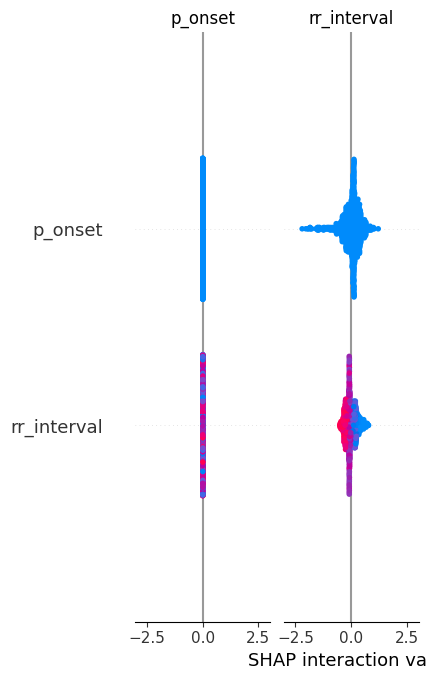

2024-12-01 19:11:33,559 - root - INFO - Plotting interactions of most important features by global SHAP values...


In [ ]:
# Применяем BlueCast

# Импорт библиотеки
from bluecast.blueprints.cast import BlueCast

# Убираем из датасета лишние столбцы
autoML_df = full_df_filtered[['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status']].copy()

auto_X = autoML_df.iloc[:, :9] # Признаки
auto_Y = autoML_df.iloc[:, [9]] # Таргеты

# Первое разбиние: 80% (тренировочные) and 20% (тестовые)
auto_X_train, auto_X_test, auto_Y_train, auto_Y_test = train_test_split(auto_X, auto_Y, test_size=0.2, random_state=1629)

# Склеиваем признаки и таргеты в один датафрейм (только для обучающей выборки)
auto_train_df = auto_X_train
auto_train_df['Healthy_Status'] = auto_Y_train

# Создаем и обучаем модель
automl = BlueCast(class_problem="binary")
automl.fit(auto_train_df, target_col="Healthy_Status")

In [ ]:
# Проверяем, как обучился BlueCast

# Предсказываем
y_probs, y_classes = automl.predict(auto_X_test)

# Импортируем библиотеки для вычисления точности
from sklearn.metrics import confusion_matrix, roc_auc_score

# Вычисляем F1-меру с помощью матрицы ошибок
cm = confusion_matrix(auto_Y_test, y_classes)
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
roc_auc = roc_auc_score(auto_Y_test, y_probs)

# Выводим матрицу ошибок, F1-меру и ROC AUC
print("Confusion matrix:", cm)
print("F1-Score:", f1_score)
print("ROC AUC:", roc_auc)

2024-11-28 16:04:40,529 - root - INFO - Start casting feature types.
2024-11-28 16:04:40,538 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-11-28 16:04:40,549 - root - INFO - Dropped the following columns as constants only: [].
2024-11-28 16:04:40,558 - root - INFO - Start filling infinite values.
2024-11-28 16:04:40,577 - root - INFO - Start date column conversion.
2024-11-28 16:04:40,579 - root - INFO - Start checking if DataFrame schema of new data is consistent with previous data.
2024-11-28 16:04:40,581 - root - INFO - Start transforming categories with binary target encoder.
2024-11-28 16:04:40,598 - root - INFO - Start transforming categories with binary target encoder.
2024-11-28 16:04:40,608 - root - INFO - Predicting...
2024-11-28 16:04:40,625 - root - INFO - Start predicting on new data using Xgboost model.
2024-11-28 16:04:40,735 - root - INFO - Finished predicting


Confusion matrix: [[821 188]
 [116 285]]
F1-Score: 0.6521739130434783
ROC AUC: 0.8596299143123362


In [ ]:
# Применяем LightAutoML

# Импорт библиотек
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

# Склеиваем признаки и таргеты в один датафрейм для тестовой выборки
auto_test_df = auto_X_test
auto_test_df['Healthy_Status'] = auto_Y_test

# Обучаем модель
automl = TabularAutoML(task = Task(name = 'binary', metric = 'auc'))
oof_preds = automl.fit_predict(auto_train_df, roles = {'target': 'Healthy_Status'}).data

# Предсказываем
test_preds = automl.predict(auto_test_df).data

2024-11-28 16:33:31,773 - lightautoml.automl.presets.base - INFO - Stdout logging level is ERROR.
2024-11-28 16:33:31,778 - lightautoml.automl.presets.base - INFO - Task: binary

2024-11-28 16:33:31,780 - lightautoml.automl.presets.base - INFO - Start automl preset with listed constraints:
2024-11-28 16:33:31,782 - lightautoml.automl.presets.base - INFO - - time: 3600.00 seconds
2024-11-28 16:33:31,783 - lightautoml.automl.presets.base - INFO - - CPU: 4 cores
2024-11-28 16:33:31,785 - lightautoml.automl.presets.base - INFO - - memory: 16 GB

2024-11-28 16:33:31,788 - lightautoml.reader.base - INFO - Train data shape: (5636, 11)

2024-11-28 16:33:36,999 - lightautoml.reader.base - INFO3 - Feats was rejected during automatic roles guess: []
2024-11-28 16:33:37,004 - lightautoml.automl.base - INFO - Layer 1 train process start. Time left 3594.78 secs
2024-11-28 16:33:37,025 - lightautoml.ml_algo.base - INFO - Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
2024-11-28 16:33:37,026 - lightaut

In [ ]:
# Проверяем, как обучился LightAutoML

from sklearn.metrics import confusion_matrix, roc_auc_score

# Выбираем порог отсечения 0.5
for i in range(len(test_preds)):
  if test_preds[i][0] > 0.5:
    test_preds[i][0] = 1
  else:
    test_preds[i][0] = 0

# Вычисляем F1-меру с помощью матрицы ошибок
cm = confusion_matrix(auto_Y_test, test_preds)
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
roc_auc = roc_auc_score(auto_Y_test, test_preds)

# Выводим матрицу ошибок и F1-меру
print("Confusion matrix:", cm)
print("F1-Score:", f1_score)
print("ROC AUC:", roc_auc)

Confusion matrix: [[1002    7]
 [  21  380]]
F1-Score: 0.964467005076142
ROC AUC: 0.9703466803753747


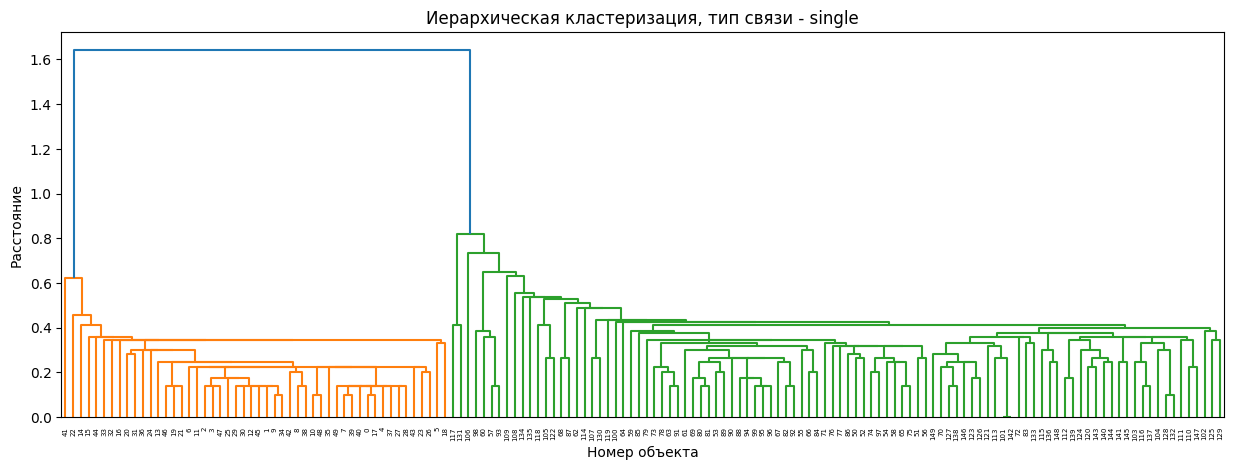

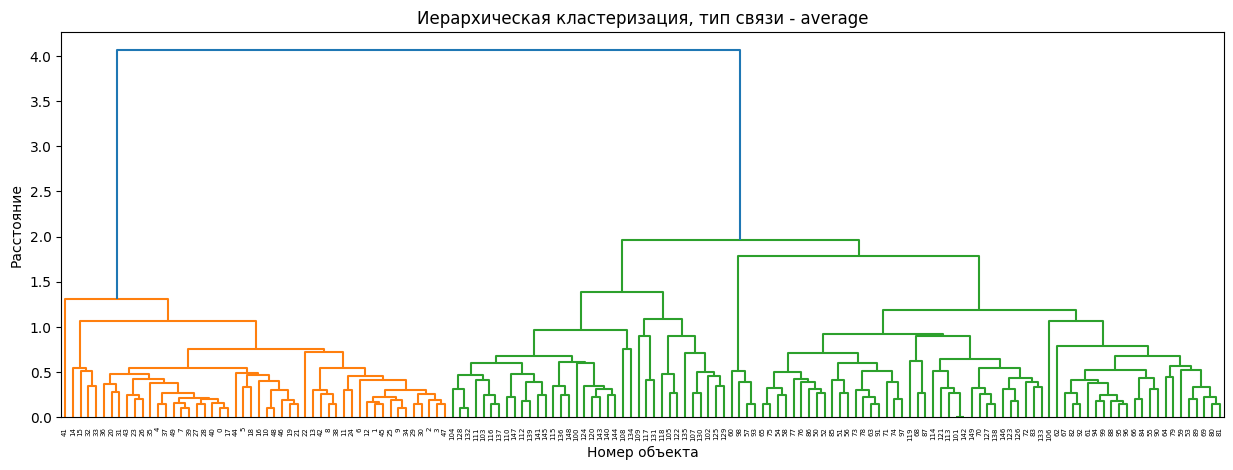

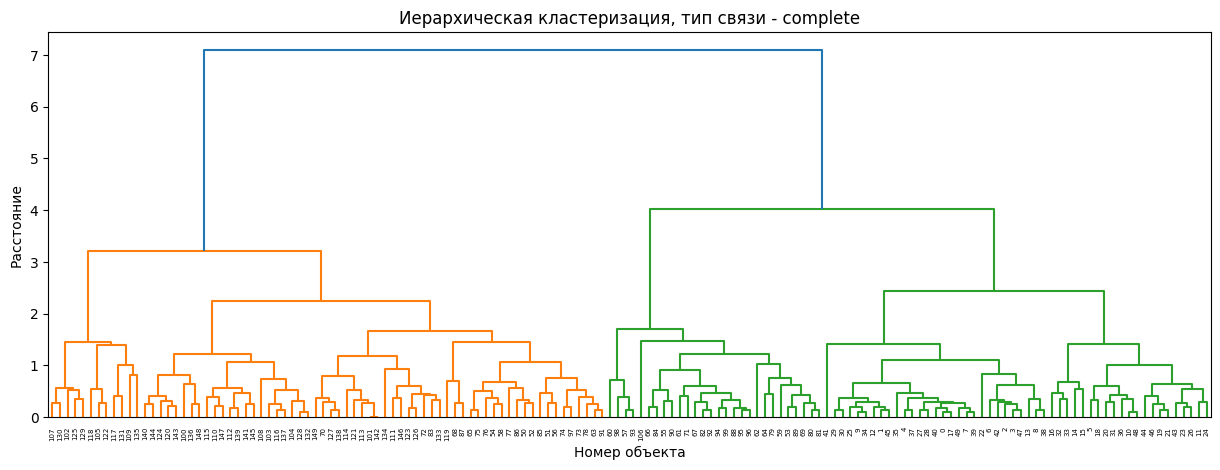

In [12]:
# Построение дендрограммы датасета ирисов

from sklearn.datasets import load_iris

# Создаем датафрейм с ирисами
iris = load_iris()
iris_df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])

# Построение трех дендрограмм
linkage_types = ['single', 'average', 'complete']
for linkage_type in linkage_types:
  link = linkage(iris_df, method=linkage_type)
  plt.figure(figsize=(15, 5))
  plt.title(f'Иерархическая кластеризация, тип связи - {linkage_type}')
  plt.xlabel('Номер объекта')
  plt.ylabel('Расстояние')
  dendrogram(link)

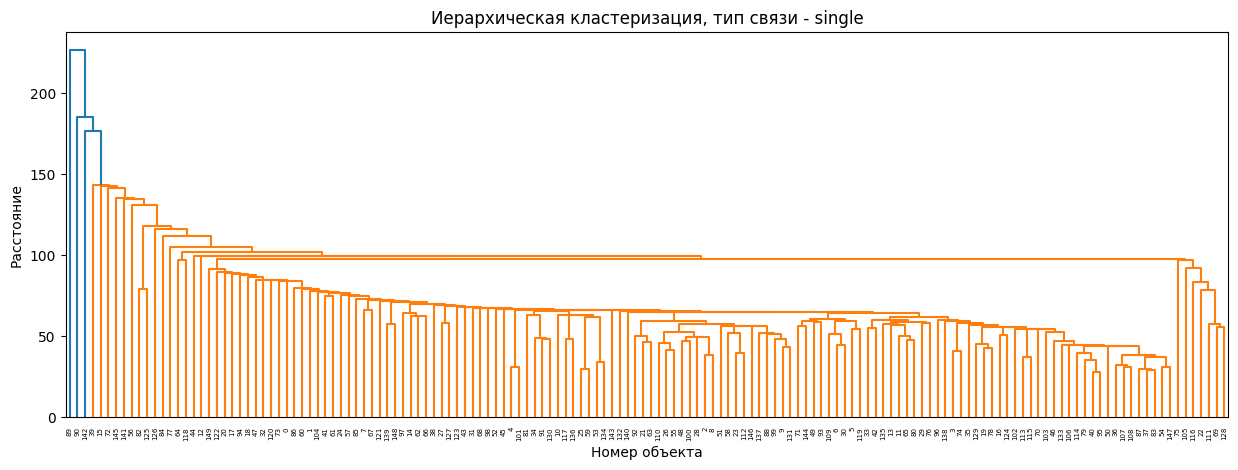

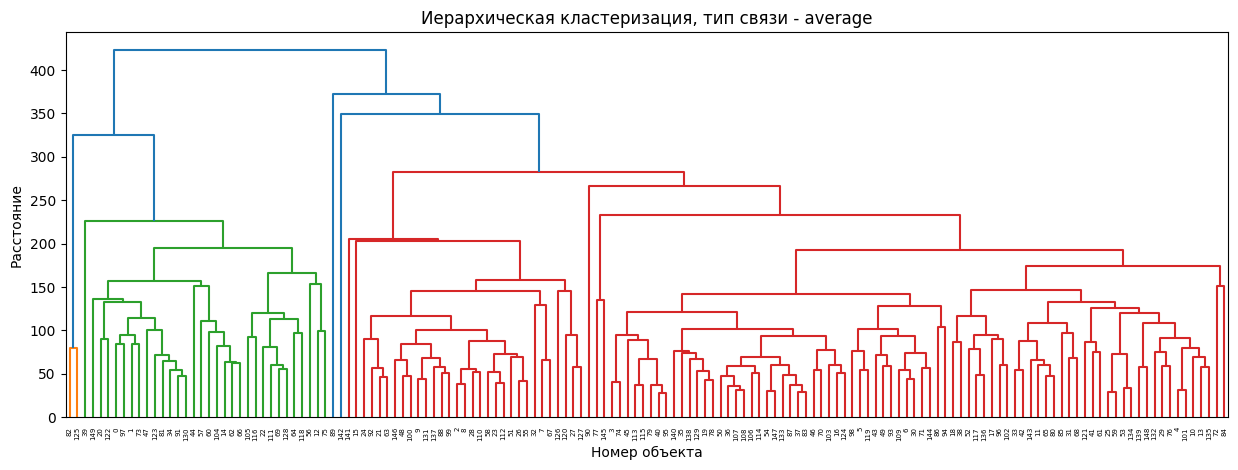

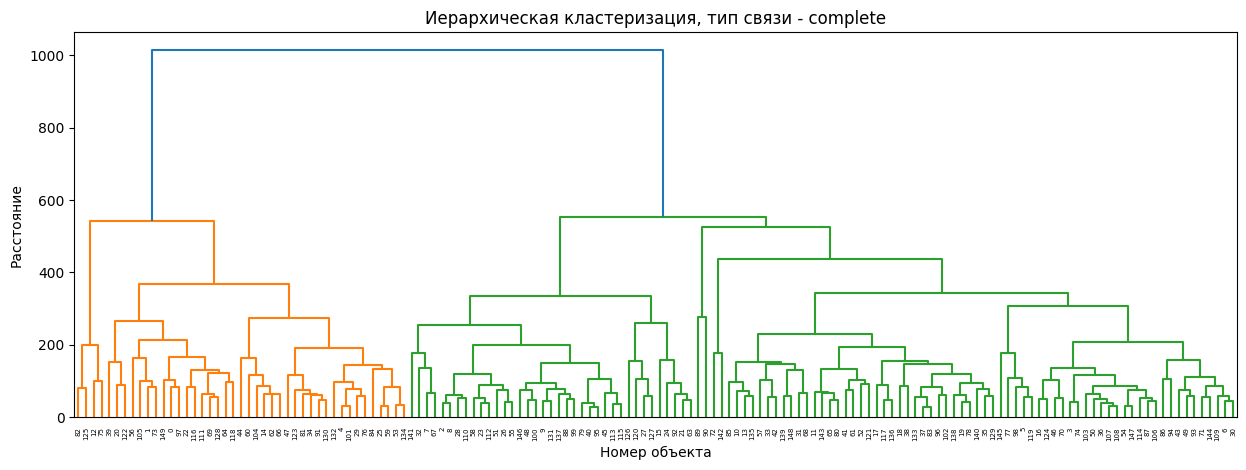

In [17]:
# Построение дендрограммы нашего учебного датасета

linkage_df = full_df_filtered[['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']].copy()
linkage_df = linkage_df.sample(n=150, random_state=42) # Берем случайные 150 наблюдений из всего датасета
linkage_types = ['single', 'average', 'complete']
for linkage_type in linkage_types:
  link = linkage(linkage_df, method=linkage_type)
  plt.figure(figsize=(15, 5))
  plt.title(f'Иерархическая кластеризация, тип связи - {linkage_type}')
  plt.xlabel('Номер объекта')
  plt.ylabel('Расстояние')
  dendrogram(link)

In [ ]:
# !!!!! ВСЁ, ЧТО НИЖЕ, НЕ СМОТРЕТЬ !!!!!

In [ ]:
# Превращаем столбец с текстовым отчетом в число с помощью Word2Vec

# Разбиваем столбец с текстовым отчетом на токены
words = [text.split() for text in full_df_filtered['report']]

# Обучаем модель Word2Vec
w2v_model = Word2Vec(words)

# Функция для получения среднего эмбеддинга строки
def get_sentence_embedding(sentence):
    words = sentence.split()
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Усреднённый вектор
    else:
        return np.zeros(w2v_model.vector_size)  # Нулевой вектор, если слова нет в модели

# Применяем функцию ко всей колонке и переводим каждый вектор в одно число
full_df_filtered['report'] = full_df_filtered['report'].apply(lambda x: get_sentence_embedding(x).mean())

full_df_filtered

,subject_id,Count_subj,study_id,cart_id,eeg_time,eeg_date,report,bandwidth,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis,Healthy_Status
4448,10001877,4,40056908,6919786,10:32:00,27.06.2014,0.033369,0.005-150 Hz,60 Hz notch Baseline filter,1034,40,120,152,248,568,-45,28,-18,0
8586,10002155,13,40107403,6578848,10:15:00,29.09.2010,0.029541,0.05-150 Hz,60 Hz notch Baseline filter,983,40,148,212,306,622,14,19,5,0
1917,10002221,13,40024801,6903271,04:14:00,12.04.2015,0.028276,0.005-150 Hz,Baseline filter,769,40,134,268,350,704,39,-3,78,0
3849,10003757,2,40049308,6672155,19:02:00,22.09.2011,0.030120,0.005-150 Hz,60 Hz notch Baseline filter,759,40,156,212,318,614,49,-7,125,0
8139,10004422,7,40102219,6228095,03:58:00,05.01.2010,0.015414,0.005-150 Hz,60 Hz notch Baseline filter,769,40,126,184,320,618,54,-58,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,19996061,3,40011859,6154636,23:44:00,03.02.2013,-0.000337,0.005-150 Hz,60 Hz notch Baseline filter,500,40,134,184,276,492,47,19,47,0
8002,19997367,36,40100360,6245150,08:32:00,17.10.2015,0.025807,0.005-150 Hz,60 Hz notch Baseline filter,923,40,154,172,268,616,44,-41,117,0
5170,19997367,36,40065685,6752764,22:57:00,19.11.2010,0.038854,0.005-150 Hz,60 Hz notch Baseline filter,495,40,134,154,248,472,63,37,-158,0
2458,19997367,36,40031683,6919786,09:40:00,04.11.2011,0.013661,0.005-150 Hz,60 Hz notch Baseline filter,1071,40,128,234,338,704,20,-25,17,0


In [ ]:
# Разбиваем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

random_seed = 17
X = full_df_filtered.iloc[:, :18]
Y = full_df_filtered.iloc[:, 18]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, random_state=random_seed, stratify=Y)

print('Распределение Y_train по классам 0 и 1 соответственно:', np.bincount(Y_train))
print('Распределение Y_test по классам 0 и 1 соответственно:', np.bincount(Y_test))

Распределение Y_train по классам 0 и 1 соответственно: [1930  729]
Распределение Y_test по классам 0 и 1 соответственно: [341 129]
